# Black Friday EDA and Feature Engineering

## Cleaning and preparing the data for model training

## Importing the Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement

## Importing the dataset

In [8]:
df_train = pd.read_csv('BlackFriday_train.csv')

In [10]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


## Importing the test dataset

In [13]:
df_test = pd.read_csv('BlackFriday_test.csv')

In [15]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


## Merging both the dataset

In [18]:
df = pd.concat([df_train,df_test])

In [22]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


## Basic Information

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


## Statistical Information

In [28]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## Droping the user ID column

In [31]:
df.drop(['User_ID'],axis=1,inplace=True)

In [33]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling Categorical feature by Gender

In [36]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling Categorical feature by Age

In [41]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [45]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


## Handling Categorical feature by City

In [51]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [53]:
df_city=pd.get_dummies(df['City_Category'],drop_first=0)

In [55]:
df_city.head()

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True


In [57]:
df=pd.concat([df,df_city],axis=1)

In [59]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,True,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,True,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,True,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,True,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,False,True


## Converted the datatype of A B C column from object to inreger using astype function

In [62]:
df['A'] = df['A'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [64]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


## Droping the City Category

In [67]:
df.drop(['City_Category'],axis=1,inplace=True)

In [69]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,1,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,0,1


## Checking the missing values

In [72]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

## Focus on replacing the Missing values for Product Category 2 and 3

In [75]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [77]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

## Mode of the Values

In [80]:
df['Product_Category_2'].mode()[0]

8.0

## Replacing the null value of the Product Category 2 by the mode of the values

In [83]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [85]:
df['Product_Category_2'].isnull().sum()

0

## For Product Category 3

In [88]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

## Replacing the null value of the Product Category 3 by the mode of the values

In [91]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [93]:
df['Product_Category_3'].isnull().sum()

0

In [95]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

In [97]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,0,1


## Handling the Staying in Current city years

In [102]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [104]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


## Convert object into Interger

In [107]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  A                           783667 non-null  int32  
 11  B                           783667 non-null  int32  
 12  C                           783667 non-null  int32  
dtypes: float64(3), int3

# Visualization

## Visualization of Age VS Purchase by Gender

In [128]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'A', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

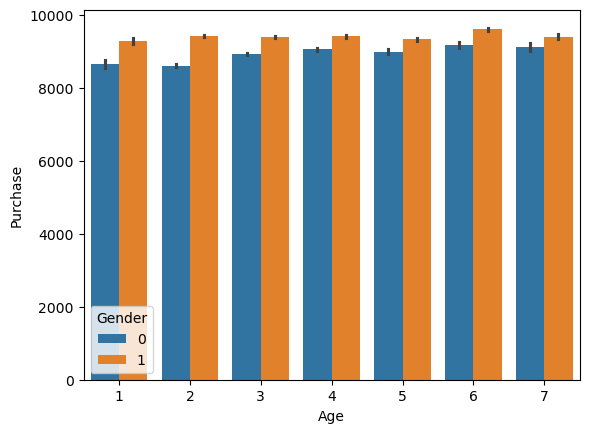

In [130]:
sns.barplot(data=df,x="Age",y="Purchase",hue="Gender")

## Visualization of Purchase with Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

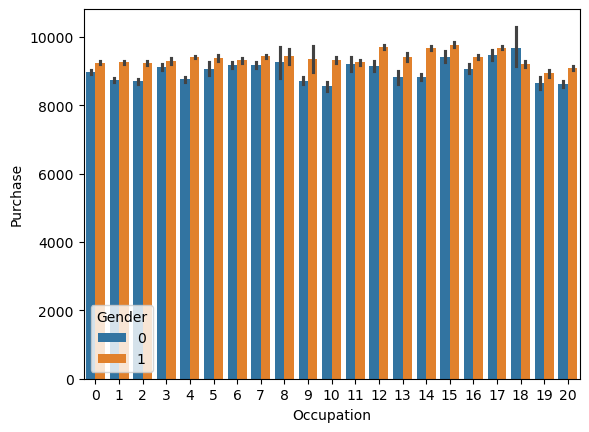

In [135]:
sns.barplot(data=df,x="Occupation",y="Purchase",hue="Gender")

## Visulization with Product Category 1 & 2 & 3 and Purchase

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

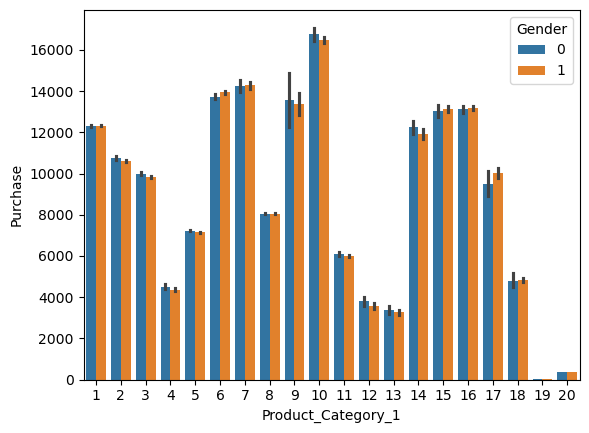

In [138]:
sns.barplot(data=df,x="Product_Category_1",y="Purchase",hue="Gender")

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

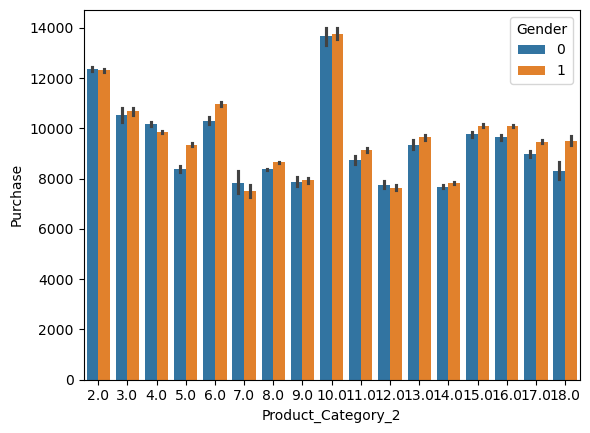

In [141]:
sns.barplot(data=df,x="Product_Category_2",y="Purchase",hue="Gender")

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

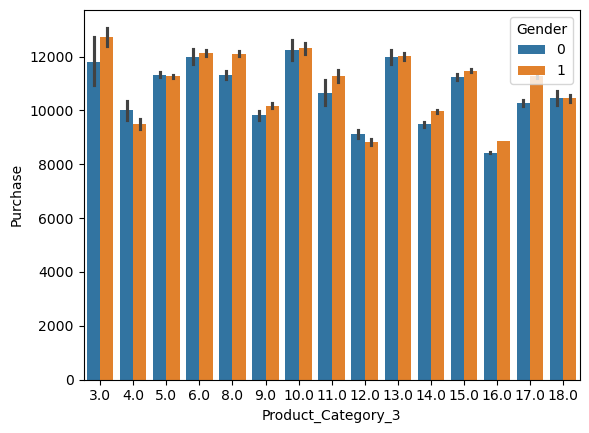

In [143]:
sns.barplot(data=df,x="Product_Category_3",y="Purchase",hue="Gender")

## Feature Scaling

In [148]:
df_test=df[df['Purchase'].isnull()]

In [150]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,0,1


In [152]:
df_train=df[~df['Purchase'].isnull()]

In [154]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [156]:
X=df_train.drop('Purchase',axis=1)

In [158]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,A,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,1,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,1,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,0,1


In [160]:
X.shape

(550068, 12)

In [162]:
y=df_train['Purchase']

In [164]:
y.shape

(550068,)

In [166]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [170]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [172]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)